In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import re
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from glob import glob

from utils import draw_trajectories, get_metric

# Tools

In [3]:
def plot_nb_steps_per_seconds(names):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
    for name in names:
        seconds, mean_n_steps, std_n_steps = get_metric(
            name, metric='nb_step_by_sec')

        if isinstance(name, tuple):
            name, label = name
        else:
            label = name
        ax.plot(seconds, mean_n_steps, label=label, linewidth=1)
        ax.fill_between(seconds,
                        mean_n_steps - std_n_steps,
                        mean_n_steps + std_n_steps, alpha=.3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Number of steps per second')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05))

In [59]:
def plot_metric(names, metric, metric_label=None, ax=None, fig=None):
    if ax is None or fig is None:
        fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
    for name in names:
        seconds, mean_n_steps, std_n_steps = get_metric(name, metric)

        if isinstance(name, tuple):
            name, label = name
        else:
            label = name
        ax.plot(seconds, mean_n_steps, label=label, linewidth=1)
        ax.fill_between(seconds,
                        mean_n_steps - std_n_steps,
                        mean_n_steps + std_n_steps, alpha=.3)
    print(f'Processed {len(names)} files for {name}')
    ax.set_xlabel('Timesteps')
    ax.set_ylabel(metric_label or metric)
    if len(names) < 10:
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05))

In [5]:
def print_duration(names):
    table = PrettyTable()
    table.field_names = ['', 'Episode Duration (s)', 'Duration per step (s)']
    for name in names:
        if name == '':
            table.add_row(['', '', ''])
            continue
        print(f'Getting duration of {name}')
        n_envs = re.search(r'n-envs-(\d+)', name).group(1)
        _, mean_duration, std_duration = get_metric(name, metric='duration')
        duration_per_step = mean_duration / (int(n_envs) * 1000)
        table.add_row([name, f'{mean_duration.item():.2f} ± {std_duration.item():.2f}', f'{duration_per_step.item():.4f}'])
    print(table)

In [5]:
def print_derivatives(names):
    fig, axs = plt.subplots(1, 3, figsize=(3*4, 4), dpi=150)
    for name in names:
        if isinstance(name, tuple):
            name, label = name
        else:
            label = name
        print(f'Drawing derivatives of {name}')
        for i, metric in enumerate(['obs/dt_theta_boat/2', 'obs/dt_theta_rudder/0', 'obs/dt_theta_sail/0']):
            keys, mean_n_steps, std_n_steps = get_metric(name, metric=metric)
            axs[i].plot(keys, mean_n_steps, linewidth=1, label=label if i == 0 else None, alpha=.5)
            axs[i].fill_between(keys,
                            mean_n_steps - std_n_steps,
                            mean_n_steps + std_n_steps, alpha=.3)
            axs[i].set_xlabel('#steps')
            axs[i].set_ylabel(metric)

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05))

# Checks

## Is the evaluation scenario exactly the same for all agents? **YES**

Processed 21 files for ../runs/08-28-max-wind-v1-scenario-1/eval-0/0/progress.csv


Processed 21 files for ../runs/08-28-max-wind-v2-scenario-1/eval-18/0/progress.csv


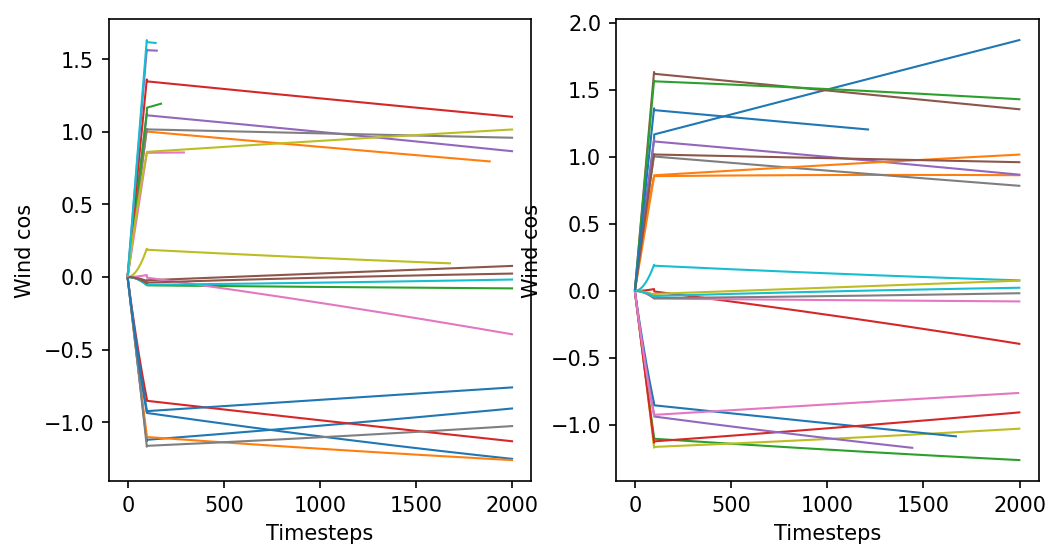

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(2*4, 4), dpi=150)
plot_metric(
    glob('../runs/08-28-max-wind-v1-scenario-1/eval-*/0/*.csv'),
    'obs/wind/0',
    'Wind cos',
    ax=axs[0], fig=fig)
plot_metric(
    glob('../runs/08-28-max-wind-v2-scenario-1/eval-*/0/*.csv'),
    'obs/wind/0',
    'Wind cos',
    ax=axs[1], fig=fig)

Processed 21 files for ../runs/08-28-max-wind-v1-scenario-1/eval-0/0/progress.csv


Processed 21 files for ../runs/08-28-max-wind-v2-scenario-1/eval-18/0/progress.csv


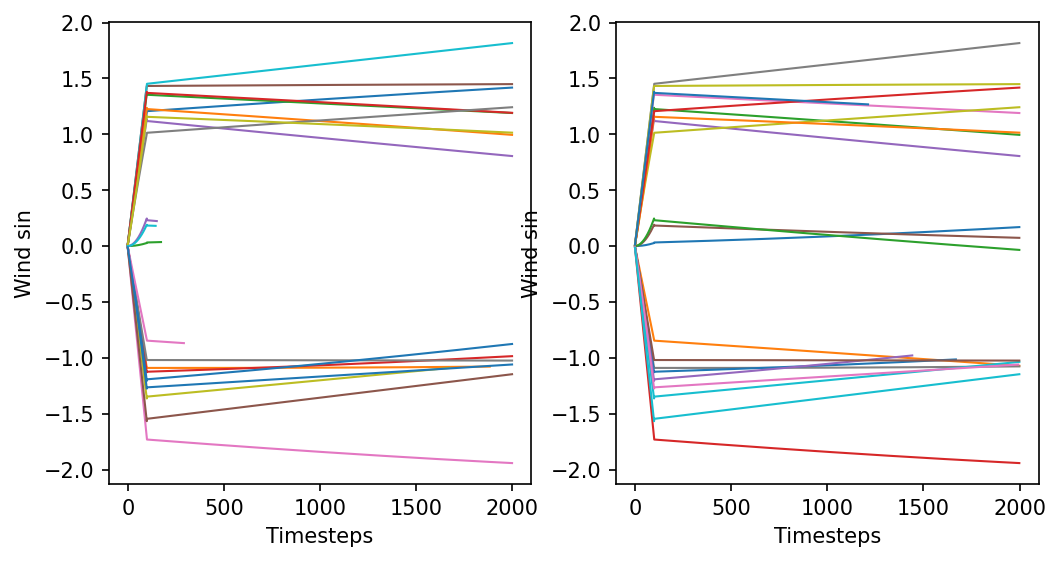

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(2*4, 4), dpi=150)
plot_metric(
    glob('../runs/08-28-max-wind-v1-scenario-1/eval-*/0/*.csv'),
    'obs/wind/1',
    'Wind sin',
    ax=axs[0], fig=fig)
plot_metric(
    glob('../runs/08-28-max-wind-v2-scenario-1/eval-*/0/*.csv'),
    'obs/wind/1',
    'Wind sin',
    ax=axs[1], fig=fig)

## What the 

# Run 28/08

08-28-max-wind-v1-scenario-1/train-*: 100%|██████████| 70/70 [00:03<00:00, 20.79it/s]


Failed to load 1 files for 08-28-max-wind-v1-scenario-1/train-*


08-28-max-wind-v1-scenario-2/train-*: 100%|██████████| 23/23 [00:00<00:00, 64.52it/s]


Failed to load 0 files for 08-28-max-wind-v1-scenario-2/train-*


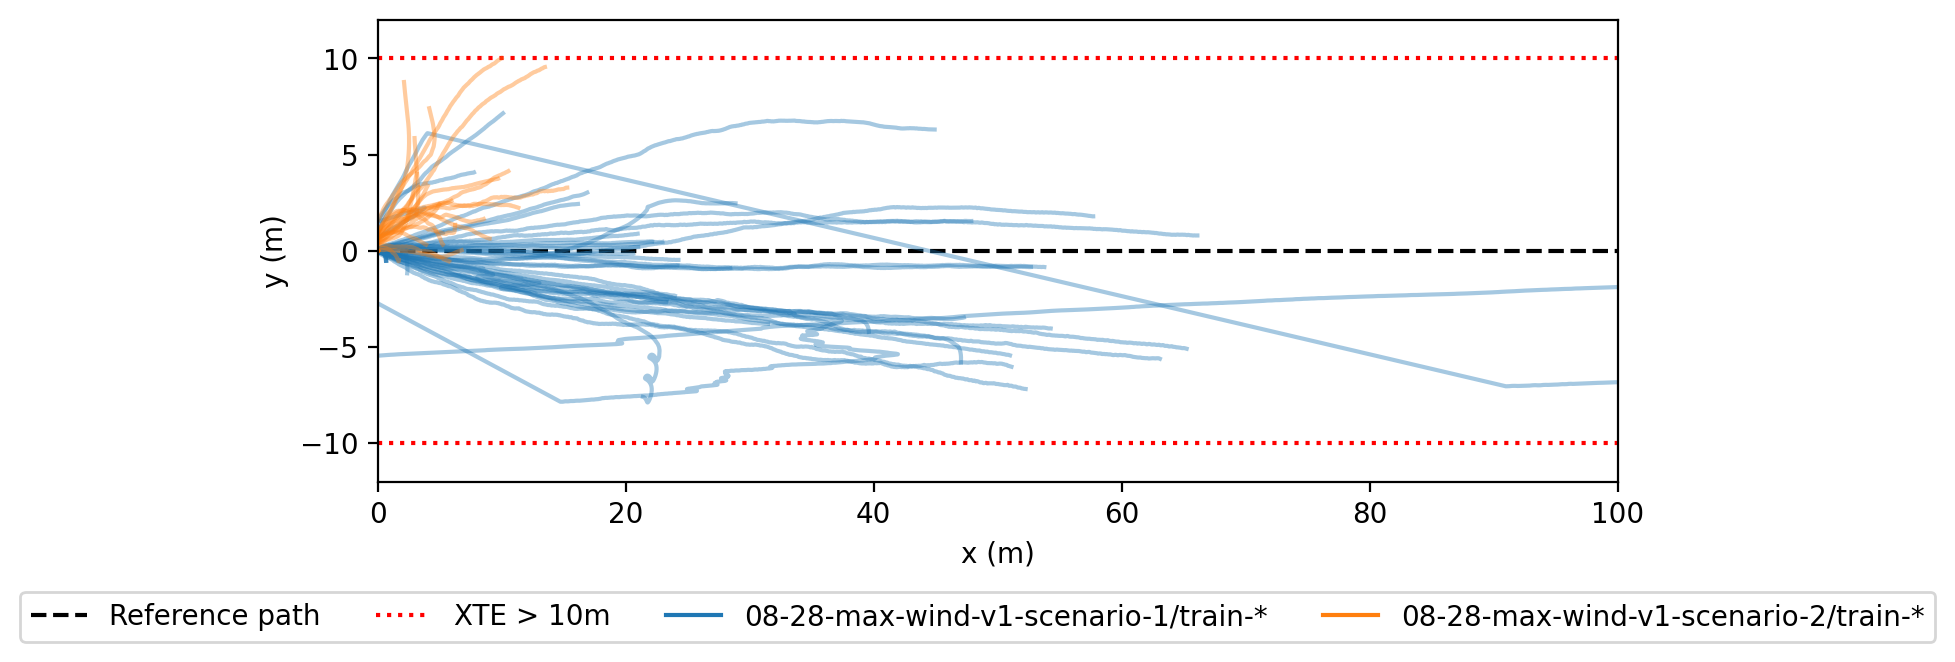

In [8]:
draw_trajectories([
    '08-28-max-wind-v1-scenario-1/train-*',
    '08-28-max-wind-v1-scenario-2/train-*',
])

../runs/08-28-max-wind-v2-scenario-1/eval-17: 100%|██████████| 1/1 [00:00<00:00, 35.71it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-17


../runs/08-28-max-wind-v2-scenario-1/eval-16: 100%|██████████| 1/1 [00:00<00:00, 39.77it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-16


../runs/08-28-max-wind-v2-scenario-1/eval-13: 100%|██████████| 1/1 [00:00<00:00, 31.02it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-13


../runs/08-28-max-wind-v2-scenario-1/eval-8: 100%|██████████| 1/1 [00:00<00:00, 42.01it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-8


../runs/08-28-max-wind-v2-scenario-1/eval-4: 100%|██████████| 1/1 [00:00<00:00, 43.23it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-4


../runs/08-28-max-wind-v2-scenario-1/eval-10: 100%|██████████| 1/1 [00:00<00:00, 42.31it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-10


../runs/08-28-max-wind-v2-scenario-1/eval-12: 100%|██████████| 1/1 [00:00<00:00, 41.40it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-12


../runs/08-28-max-wind-v2-scenario-1/eval-2: 100%|██████████| 1/1 [00:00<00:00, 41.40it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-2


../runs/08-28-max-wind-v2-scenario-1/eval-20: 100%|██████████| 1/1 [00:00<00:00, 42.31it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-20


../runs/08-28-max-wind-v2-scenario-1/eval-1: 100%|██████████| 1/1 [00:00<00:00, 36.21it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-1


../runs/08-28-max-wind-v2-scenario-1/eval-7: 100%|██████████| 2/2 [00:00<00:00, 70.53it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-7


../runs/08-28-max-wind-v2-scenario-1/eval-11: 100%|██████████| 1/1 [00:00<00:00, 36.01it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-11


../runs/08-28-max-wind-v2-scenario-1/eval-3: 100%|██████████| 1/1 [00:00<00:00, 41.96it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-3


../runs/08-28-max-wind-v2-scenario-1/eval-6: 100%|██████████| 1/1 [00:00<00:00, 42.57it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-6


../runs/08-28-max-wind-v2-scenario-1/eval-14: 100%|██████████| 2/2 [00:00<00:00, 69.05it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-14


../runs/08-28-max-wind-v2-scenario-1/eval-9: 100%|██████████| 1/1 [00:00<00:00, 42.51it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-9


../runs/08-28-max-wind-v2-scenario-1/eval-0: 100%|██████████| 2/2 [00:00<00:00, 75.28it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-0


../runs/08-28-max-wind-v2-scenario-1/eval-5: 100%|██████████| 1/1 [00:00<00:00, 41.39it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-5


../runs/08-28-max-wind-v2-scenario-1/eval-19: 100%|██████████| 1/1 [00:00<00:00, 41.47it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-19


../runs/08-28-max-wind-v2-scenario-1/eval-15: 100%|██████████| 1/1 [00:00<00:00, 42.89it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-15


../runs/08-28-max-wind-v2-scenario-1/eval-18: 100%|██████████| 2/2 [00:00<00:00, 70.65it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-18


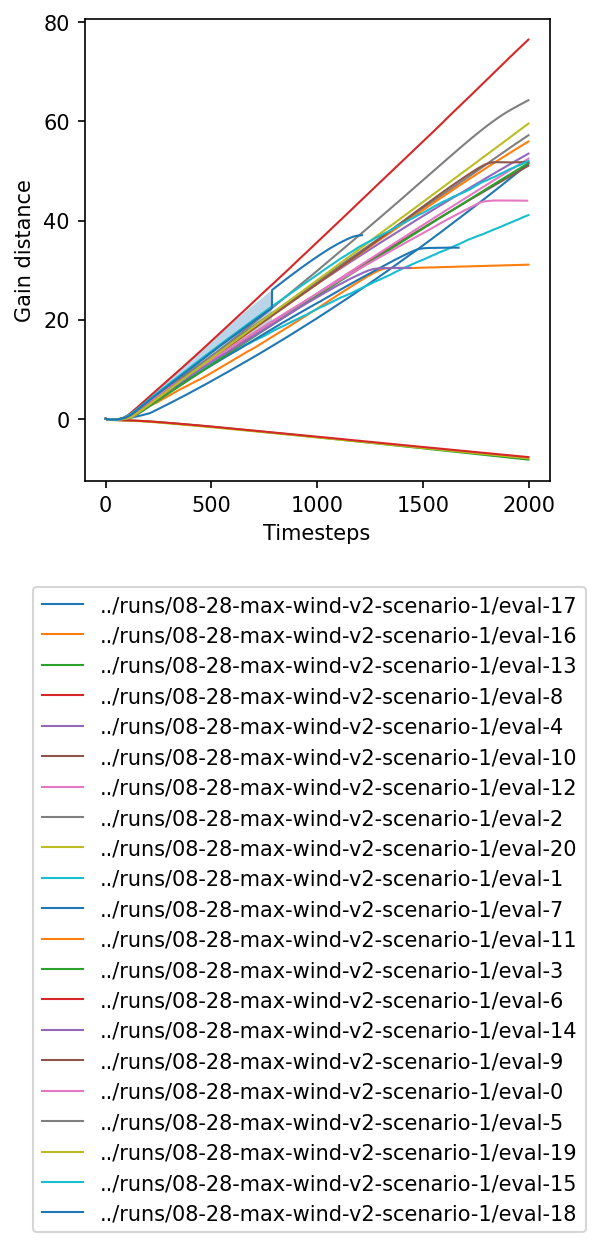

In [31]:
plot_metric(
    list(glob('../runs/08-28-max-wind-v2-scenario-1/eval-*')),
    'obs/cum_obs/gain_dist/0',
    'Gain distance')

Processed 21 files for ../runs/08-28-max-wind-v2-scenario-1/eval-18/0/progress.csv


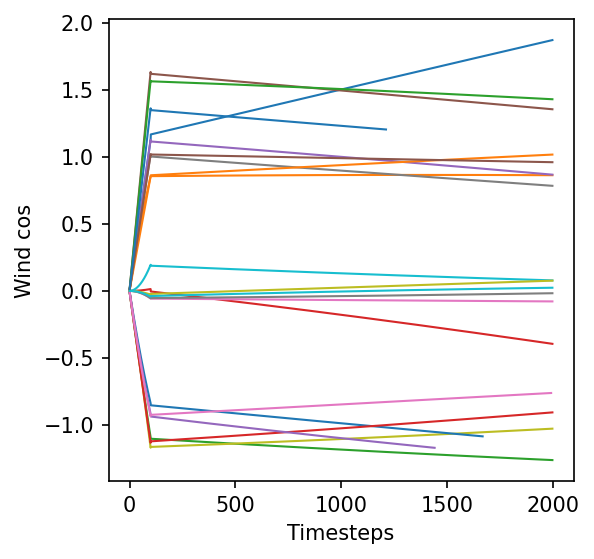

In [48]:
plot_metric(
    glob('../runs/08-28-max-wind-v2-scenario-1/eval-*/0/*.csv'),
    'obs/wind/0',
    'Wind cos')

Processed 21 files for ../runs/08-28-max-wind-v1-scenario-1/eval-0/0/progress.csv


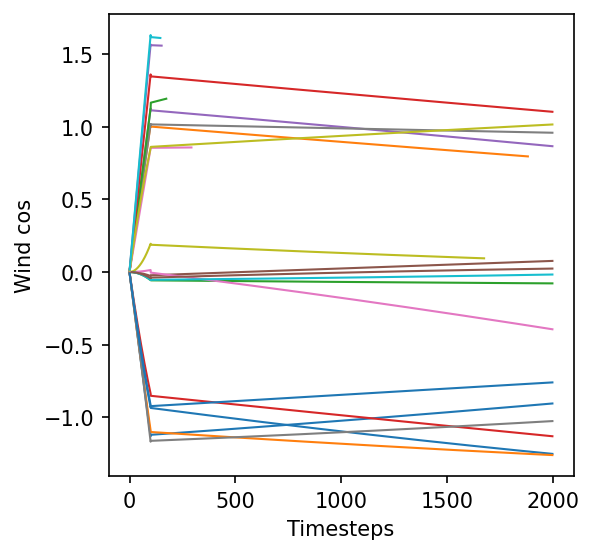

In [49]:
plot_metric(
    glob('../runs/08-28-max-wind-v1-scenario-1/eval-*/0/*.csv'),
    'obs/wind/0',
    'Wind cos')

../runs/08-28-max-wind-v1-scenario-1/eval-*: 100%|██████████| 63/63 [00:00<00:00, 95.14it/s] 


Failed to load 0 files for ../runs/08-28-max-wind-v1-scenario-1/eval-*


../runs/08-28-max-wind-v2-scenario-1/eval-*: 100%|██████████| 25/25 [00:00<00:00, 44.48it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-*


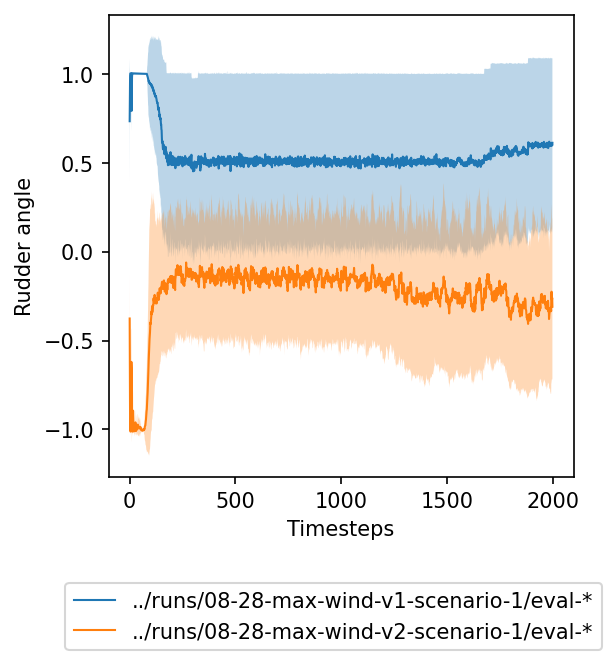

In [40]:
plot_metric(
    [
        '../runs/08-28-max-wind-v1-scenario-1/eval-*',
        '../runs/08-28-max-wind-v2-scenario-1/eval-*'
    ],
    'obs/theta_rudder/0',
    'Rudder angle')

../runs/08-28-max-wind-v1-scenario-1/eval-*: 100%|██████████| 63/63 [00:00<00:00, 100.05it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v1-scenario-1/eval-*


../runs/08-28-max-wind-v2-scenario-1/eval-*: 100%|██████████| 25/25 [00:00<00:00, 46.21it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-*


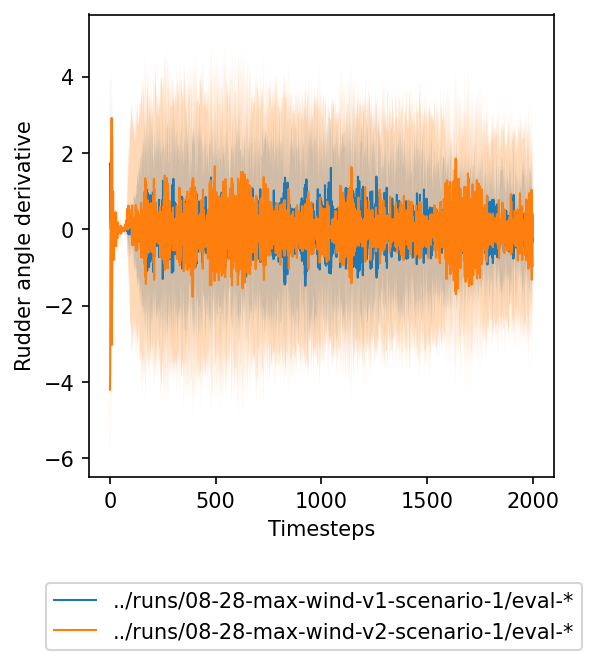

In [42]:
plot_metric(
    [
        '../runs/08-28-max-wind-v1-scenario-1/eval-*',
        '../runs/08-28-max-wind-v2-scenario-1/eval-*'
    ],
    'obs/dt_theta_rudder/0',
    'Rudder angle derivative')

../runs/08-28-max-wind-v1-scenario-1/eval-*: 100%|██████████| 63/63 [00:00<00:00, 84.45it/s] 


Failed to load 0 files for ../runs/08-28-max-wind-v1-scenario-1/eval-*


../runs/08-28-max-wind-v2-scenario-1/eval-*: 100%|██████████| 25/25 [00:00<00:00, 43.74it/s]


Failed to load 0 files for ../runs/08-28-max-wind-v2-scenario-1/eval-*


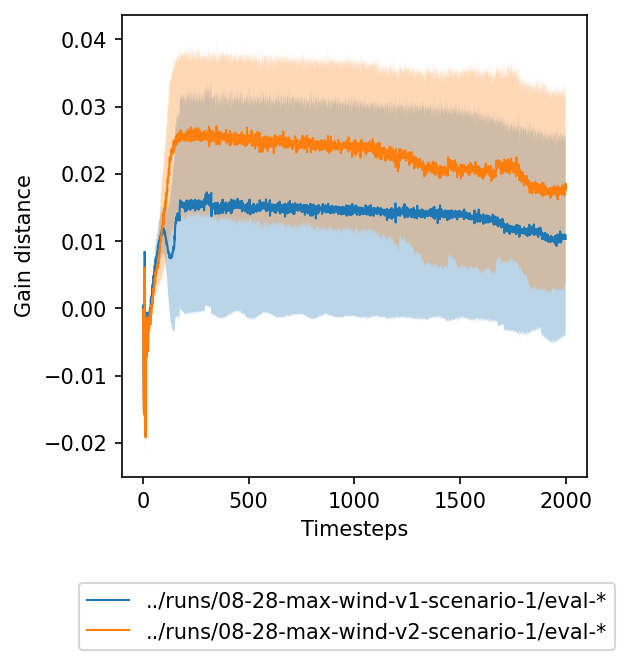

In [43]:
plot_metric(
    [
        '../runs/08-28-max-wind-v1-scenario-1/eval-*',
        '../runs/08-28-max-wind-v2-scenario-1/eval-*'
    ],
    'obs/gain_dist/0',
    'Gain distance')